In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [8]:
Raw_Housing_Data = pd.read_csv("(Housing Prices).csv")

In [8]:
Raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


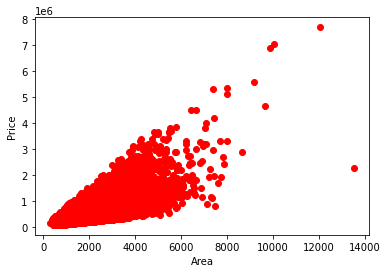

In [11]:
plt.scatter(x= Raw_Housing_Data['Flat Area (in Sqft)'], y = Raw_Housing_Data['Sale Price'],color = 'red')
plt.xlabel("Area")
plt.ylabel('Price')
plt.show()

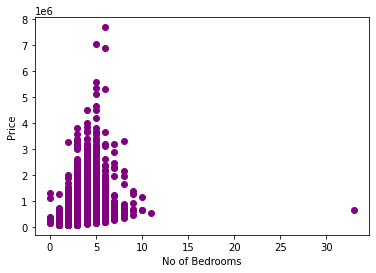

In [12]:
plt.scatter(x=Raw_Housing_Data['No of Bedrooms'], y = Raw_Housing_Data['Sale Price'], color='PURPLE')
plt.xlabel('No of Bedrooms')
plt.ylabel('Price')
plt.show()

In [14]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [16]:
Raw_Housing_Data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
Raw_Housing_Data['No of Bathrooms'] = pd.to_numeric(Raw_Housing_Data['No of Bathrooms'],errors='coerce').fillna(0).astype(int)

In [20]:
Raw_Housing_Data['Sale Price'] = pd.to_numeric(Raw_Housing_Data['Sale Price'],errors='coerce').fillna(0).astype(int)

In [23]:
Raw_Housing_Data['Flat Area (in Sqft)'] = pd.to_numeric(Raw_Housing_Data['Flat Area (in Sqft)'],errors='coerce').fillna(0).astype(int)

In [26]:
for col in Raw_Housing_Data.columns:
    pct_missing = np.mean(Raw_Housing_Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

index - 0%
ID - 0%
Date House was Sold - 0%
Sale Price - 0%
No of Bedrooms - 0%
No of Bathrooms - 0%
Flat Area (in Sqft) - 0%
Lot Area (in Sqft) - 0%
No of Floors - 0%
Waterfront View - 0%
No of Times Visited - 0%
Condition of the House - 0%
Overall Grade - 0%
Area of the House from Basement (in Sqft) - 0%
Basement Area (in Sqft) - 0%
Age of House (in Years) - 0%
Renovated Year - 0%
Zipcode - 0%
Latitude - 0%
Longitude - 0%
Living Area after Renovation (in Sqft) - 0%
Lot Area after Renovation (in Sqft) - 0%


In [ ]:
# Histogram

(array([3592., 2663., 2784., 2525., 3218., 2587., 1361., 1079.,  952.,
         852.]),
 array([  3. ,  14.5,  26. ,  37.5,  49. ,  60.5,  72. ,  83.5,  95. ,
        106.5, 118. ]),
 <BarContainer object of 10 artists>)

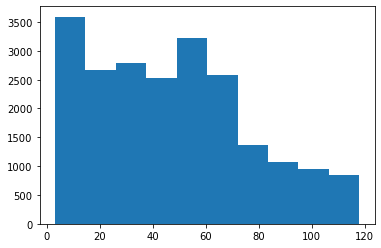

In [17]:
plt.hist(Raw_Housing_Data['Age of House (in Years)'], bins = 10)

In [ ]:
# BOX PLOT

{'whiskers': [<matplotlib.lines.Line2D at 0x2413c2df8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2413c2dff40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2413c2df490>],
 'medians': [<matplotlib.lines.Line2D at 0x2413c2ee6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2413c2eea30>],
 'means': []}

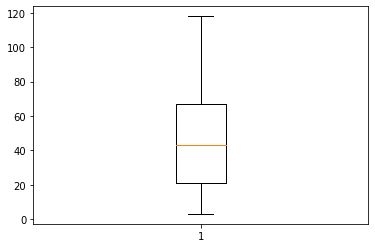

In [18]:
plt.boxplot(Raw_Housing_Data['Age of House (in Years)'])

In [17]:
Raw_Housing_Data = Raw_Housing_Data.reset_index()

In [14]:
correlation = Raw_Housing_Data.corr()

<AxesSubplot:>

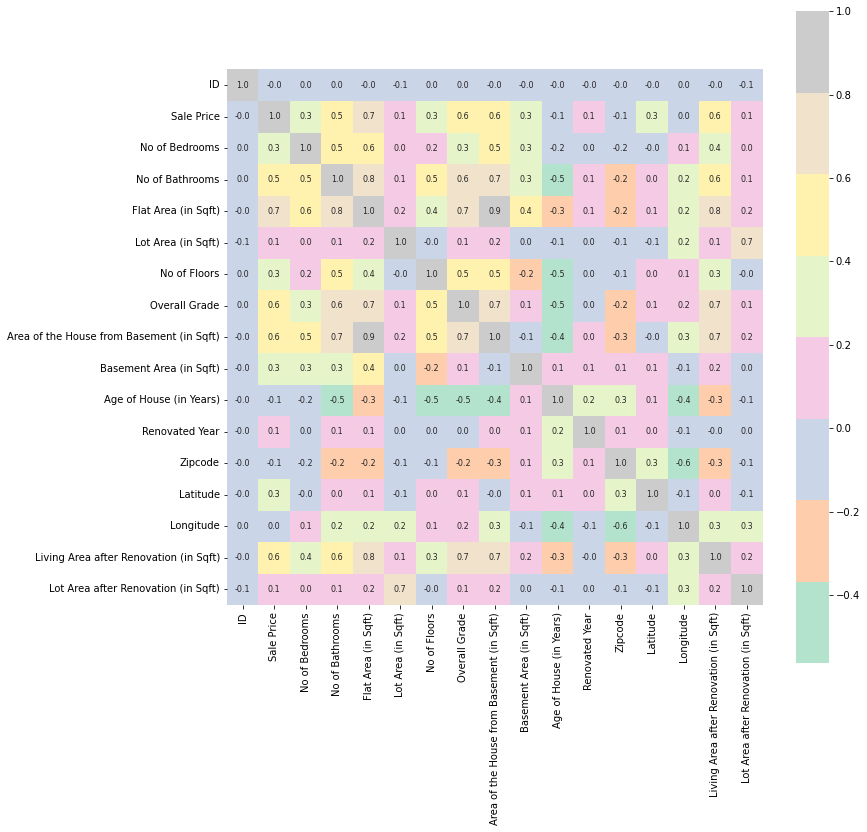

In [15]:
plt.figure(figsize = (12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Pastel2')

In [34]:
X = Raw_Housing_Data[['Flat Area (in Sqft)', 'No of Bathrooms',
               'No of Bedrooms']]

y = Raw_Housing_Data['Sale Price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [36]:
lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression()

In [28]:
print(Raw_Housing_Data.isnull().sum())

index                                        0
ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area afte

In [33]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   index                                      21613 non-null  int64  
 1   ID                                         21613 non-null  int64  
 2   Date House was Sold                        21613 non-null  object 
 3   Sale Price                                 21613 non-null  int32  
 4   No of Bedrooms                             21613 non-null  int64  
 5   No of Bathrooms                            21613 non-null  int32  
 6   Flat Area (in Sqft)                        21613 non-null  int32  
 7   Lot Area (in Sqft)                         21604 non-null  float64
 8   No of Floors                               21613 non-null  float64
 9   Waterfront View                            21613 non-null  object 
 10  No of Times Visited   

In [37]:
print(lm.intercept_)

78482.35138627049


In [39]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) 

In [40]:
coeff_df

,Coefficient
Flat Area (in Sqft),298.455276
No of Bathrooms,28850.985621
No of Bedrooms,-62156.875379


In [41]:
predictions = lm.predict(X_test) 

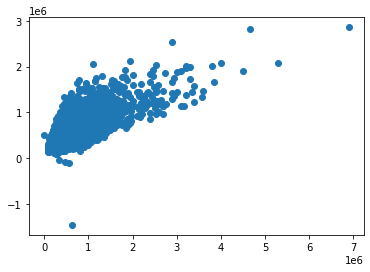

In [42]:
plt.scatter(y_test,predictions)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


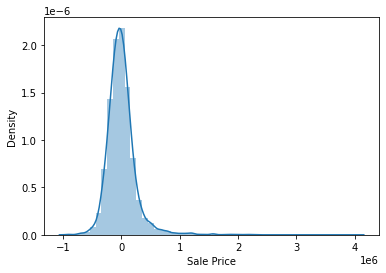

In [43]:
sns.distplot((y_test-predictions),bins=50);

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 168746.15822035546
MSE: 64893230226.80701
RMSE: 254741.4968685059
